In [11]:
from __future__ import print_function

import matplotlib.pyplot as plt

import numpy as np
import itertools

import skimage.transform

%matplotlib inline

In [14]:
# Размер изображения, к которому приводятся матрицы соответствия
shingle_image_size = 16

def shingles_list(s, n):
    '''
    Из строки s получаем список шинглов длиной по n символов. Сохраняем
    порядок следования шинглов.
    '''
    return [u''.join(z) for z in itertools.izip(*[s[i:] for i in range(n)])]


def get_shingle_image(str1, str2):
    '''
    Для двух заданных строк str1 и str2 строится матрица соответствия шинглов,
    затем она как прямоугольное изображение сжимается к фиксированному размеру.
    '''
    shingles1 = shingles_list(str1, 3)
    shingles2 = shingles_list(str2, 3)
    image = np.zeros((len(shingles1), len(shingles2)), dtype='float32')
    for i1, shingle1 in enumerate(shingles1):
        for i2, shingle2 in enumerate(shingles2):
            if shingle1 == shingle2:
                image[i1, i2] = 1.0

    image_resized = skimage.transform.resize(image,
                                             (shingle_image_size, shingle_image_size))
    return (image, image_resized)


In [15]:
image0, image1 = get_shingle_image(u'кошка отчаянно ловит серую мышку',
                                   u'серую мышку хочет поймать кошка')

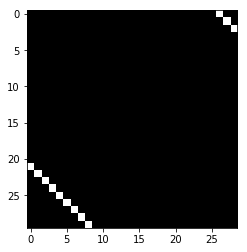

In [16]:
plt.imshow(image0, cmap='gray')

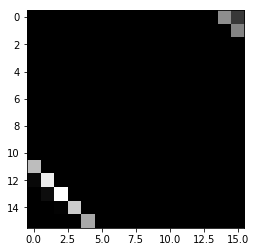

In [17]:
plt.imshow(image1, cmap='gray')